# 2017 Solar Eclipse Muon Rate Study
This Jupyter notebook lets you analyze data from a Quarknet cosmic ray muon detector and look for patterns in the rate count. Follow the [Quarknet 2017 Eclipse site](https://sites.google.com/view/quarknet2017eclipse/home) for more info. If this is your first time using this, try the [5-minute Intro to Jupyter activity](./Intro_to_Jupyter.ipynb) first.  

Start by selecting Kernel > restart and clear output. Then, run each cell with shift-enter. Remeber, you can edit and re-run the code all you want. To reset everything, go to File > revert to checkpoint, then restart the kernel again.

In [1]:
# imports some software packages we'll use
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
inline_rc = dict(mpl.rcParams)

In [3]:
# Edit the next line to pull a file from a different URL
data = pd.read_table('https://github.com/adamlamee/HEP-data/raw/master/eclipse_sample.txt', skiprows=2, index_col=False)

cols = data.columns
cols = cols.map(lambda x: x.replace('.', '_') if isinstance(x, (str or unicode)) else x)
data.columns = cols

data['temp'] = data.JulDay + data.MinFracDay.round(2)
data.insert(1, 'time', pd.to_datetime(data.temp.astype(float), origin='julian', unit='D'))
data.drop('temp', axis=1, inplace=True)

# You could duplicate what's below for a 2nd DAQ. Hint: columns are numbered starting with zero( the 9th column is # 8)
data['DAQ1p1'] = data.iloc[:,8] > 0
data['DAQ1p2'] = data.iloc[:,10] > 0
data['DAQ1p3'] = data.iloc[:,12] > 0
data['DAQ1p4'] = data.iloc[:,14] > 0

In [4]:
# This shows the first 3 rows of the data table. Scroll right to see it all.
data.head(3)

,Evnt,time,#HitDAQ1,#HitDAQ2,MinFracDay,JulDay,SSDB,eventDateTime,6119_1FracDay,6119_1nsAfter1stHit,...,6148_2FracDay,6148_2nsAfter1stHit,6148_3FracDay,6148_3nsAfter1stHit,6148_4FracDay,6148_4nsAfter1stHit,DAQ1p1,DAQ1p2,DAQ1p3,DAQ1p4
0,1,2015-02-13 23:16:48,4,2,0.473367,2457067,40898.879069,"Feb 13, 2015 23:21:38 UTC",0.473367,5.002,...,0.473367,246.595,-1.000000,-1.000,-1.000000,-1.000,True,True,True,True
1,2,2015-02-13 23:31:12,4,2,0.478424,2457067,41335.859636,"Feb 13, 2015 23:28:55 UTC",0.478424,6.259,...,0.478424,249.108,-1.000000,-1.000,-1.000000,-1.000,True,True,True,True
2,3,2015-02-13 23:31:12,4,4,0.480581,2457067,41522.205862,"Feb 13, 2015 23:32:02 UTC",0.480581,2.504,...,0.480581,301.597,0.480581,306.408,0.480581,298.902,True,True,True,True


## Choose the coincidence
The cell below reduces the data set to only include events for which paddles 1 and 2 recorded hits. You can edit the code to look for coincidence between other paddle combinations, too.

In [5]:
# coincidence of paddles 1 & 2
newdata = data.query('DAQ1p1 == True and DAQ1p2 == True')

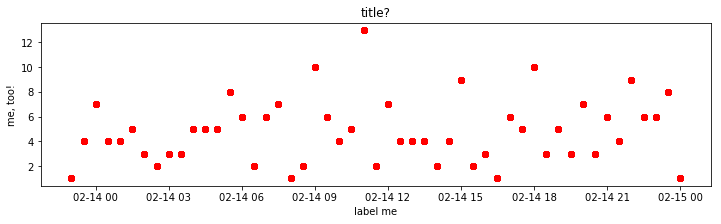

In [6]:
# resample rate sets counts/min for rate study (e.g., '30min' looks at counts/30 minutes)
plotdata = newdata.resample('30min', on='time').count()

# And this plots the rate count
plt.figure(figsize=(12,3))
plt.plot(plotdata, 'ro');
plt.title('title?')
plt.xlabel('label me')
plt.ylabel('me, too!')

## Saving Your Work
This is running on a Google Compute Engine server on a distant planet and deletes what you've done after 20 minutes of inactivity or after you close your browser. To save for later use or analysis you have a few options:
- File > Download as > ipynb to continue your analysis later (come back here and upload it or install Jupyter on your own device)
- File > Download as > pdf (static copy including code and graphs)
- Right-click on a graph and select Save Image As ... (to share a pic)  

## Credits
This Jupyter notebook was the brainchild of [Quarknet](https://quarknet.i2u2.org/) staffer Mark Adams, eclipse file output designed by Sudha Balakrishnan, Joel Griffith sorted out web access to the data files, and this notebook was designed by [Adam LaMee](https://adamlamee.github.io/) all for Quarknet's Eclipse 2017 Cosmic Ray Study. Thanks to the great folks at [MyBinder.org](https://beta.mybinder.org/) for making this notebook is interactive without you needing to install anything.